In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import glob

In [2]:
data = pd.read_csv('C:/Users/ale/Documents/Tec/SPHEREdata/train/00001/acceleration.csv')
df = pd.DataFrame(data, columns=['t','x','y','z'])
df.head()

,t,x,y,z
0,0.017856,0.944,-0.280,0.152
1,0.067904,0.944,-0.292,0.156
2,0.117952,0.946,-0.286,0.156
3,0.168000,0.942,-0.288,0.160
4,0.217856,0.946,-0.286,0.158


In [3]:
activity0 = pd.read_csv('C:/Users/ale/Documents/Tec/SPHEREdata/train/00001/annotations_0.csv')
activity1 = pd.read_csv('C:/Users/ale/Documents/Tec/SPHEREdata/train/00001/annotations_1.csv')
activity0.head()

,start,end,name,index
0,45.930,49.730,a_walk,4
1,49.843,53.886,t_turn,19
2,53.958,58.727,p_stand,10
3,58.821,60.821,t_turn,19
4,60.892,61.240,p_stand,10


In [4]:
def merge_annotations(data, annotations, column_name):
    data[column_name] = 0
    for i in range(len(data)):
        for j in range(len(annotations)):
            if data['t'][i] > activity0['start'][j] and data['t'][i] < activity0['end'][j]:
                data[column_name][i] = activity0['name'][j]
    return data 

In [5]:
newData = merge_annotations(df, activity0, 'annotation0')

<ipython-input-4-028b8110d78b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name][i] = activity0['name'][j]
C:\Users\ale\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
def sleep_windows(data):
    for i in range(len(newData)):
        if data['annotation0'][i] == 'p_lie' or data['annotation0'][i] == 't_lie_sit' or data['annotation0'][i] == 't_sit_lie' or data['annotation0'][i] == 't_turn':
            pass
        else:
            data = data.drop([i])
    data = data.reset_index()
    return data

In [7]:
sleepData = sleep_windows(newData)
sleepData.head()

,index,t,x,y,z,annotation0
0,990,49.865856,0.808,-0.430,0.382,t_turn
1,991,49.915904,0.754,-0.610,0.248,t_turn
2,992,49.965952,0.470,-0.820,0.182,t_turn
3,993,50.016000,0.274,-0.796,0.192,t_turn
4,994,50.065856,0.104,-0.994,0.040,t_turn


In [8]:
def arm_angle(df):
    arm_angles = []
    for i in range(len(df)):
        omega = df['z'][i]/(m.sqrt(df['x'][i]**2 + df['y'][i]**2))
        angle = (m.atan(omega))*(180/m.pi)
        arm_angles.append(angle)
    df['arm_angle'] = arm_angles
    df['arm_angle'] = df['arm_angle'].rolling(window=11).mean()
    return df

def change(df):
    change = []
    for i in range(len(df)):
        try:
            delta = df['arm_angle'][i] - df['arm_angle'][i-1]
            change.append(delta)
        except KeyError:
            change.append(np.nan)
    df['change'] = change
    return df

In [9]:
d = arm_angle(sleepData)
finalData = change(d)
finalData = finalData.drop(['index'], axis=1)

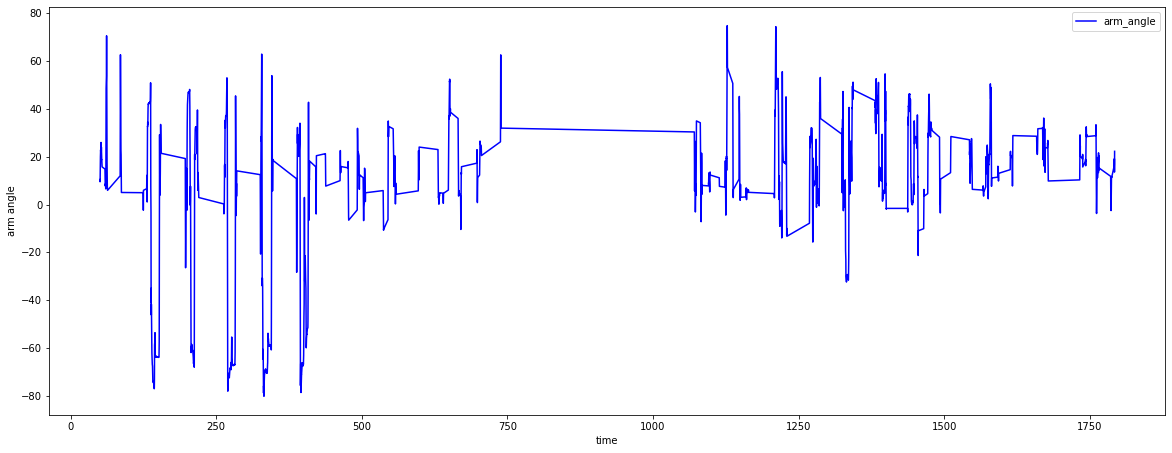

In [13]:
plt.figure(figsize=(20, 7.5))
plt.plot(finalData['t'], finalData['arm_angle'], label='arm_angle', color='b')
plt.xlabel('time')
plt.ylabel('arm angle')
plt.legend()
plt.show()

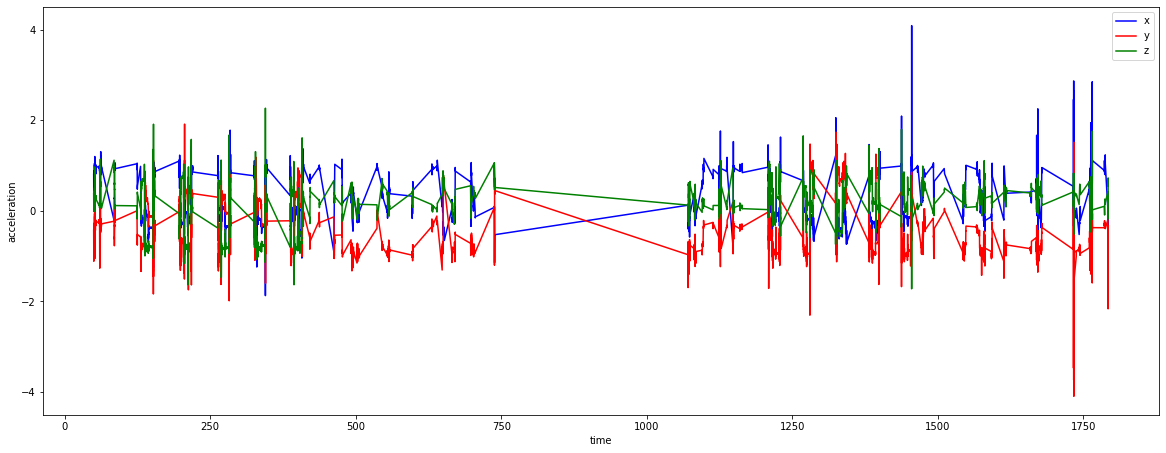

In [14]:
plt.figure(figsize=(20, 7.5))
plt.plot(finalData['t'], finalData['x'], label='x', color='b')
plt.plot(finalData['t'], finalData['y'], label='y', color='r')
plt.plot(finalData['t'], finalData['z'], label='z', color='g')

plt.xlabel('time')
plt.ylabel('acceleration')
plt.legend()
plt.show()

In [33]:
finalData.head(3040)

,t,x,y,z,annotation0,arm_angle,change
0,49.865856,0.808,-0.430,0.382,t_turn,NaN,NaN
1,49.915904,0.754,-0.610,0.248,t_turn,NaN,NaN
2,49.965952,0.470,-0.820,0.182,t_turn,NaN,NaN
3,50.016000,0.274,-0.796,0.192,t_turn,NaN,NaN
4,50.065856,0.104,-0.994,0.040,t_turn,NaN,NaN
...,...,...,...,...,...,...,...
3035,738.775904,-0.544,0.368,0.616,t_turn,34.333614,-3.868061
3036,738.825952,-0.526,0.450,0.518,t_turn,31.934763,-2.398850
3037,1070.894904,0.126,-0.968,0.128,t_turn,30.337718,-1.597046
3038,1070.944952,0.062,-1.694,0.150,t_turn,27.769731,-2.567987


In [35]:
finalData[0:3036].to_csv('C:/Users/ale/Documents/Tec/sleep_episodes/00001/sleep_1.csv', index = False)
finalData[3037:].to_csv('C:/Users/ale/Documents/Tec/sleep_episodes/00001/sleep_2.csv', index = False)